## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import math

In [85]:
x = np.arange(0, 2*np.pi, 0.1)
y1 = np.sin(x)
y2 = np.cos(x)

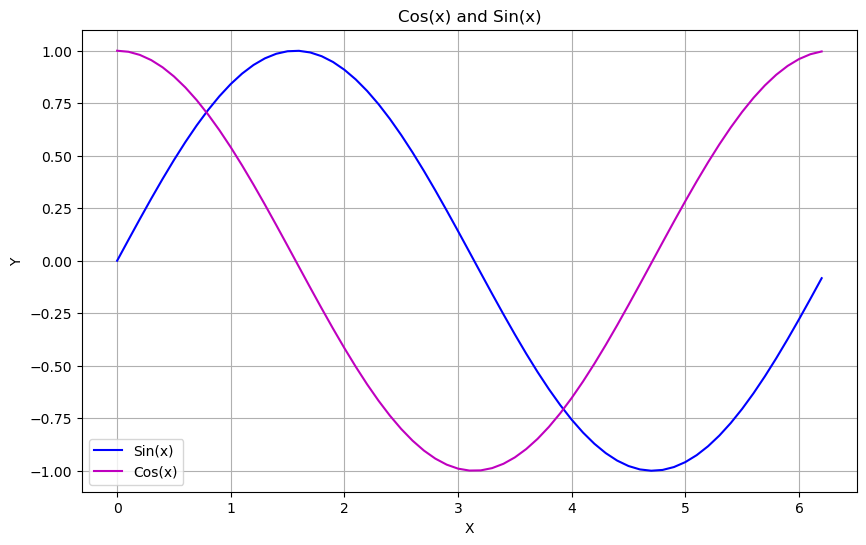

In [86]:
plt.figure(figsize=(10,6))
plt.plot(x,y1,label='Sin(x)',color='b')
plt.plot(x,y2,label='Cos(x)',color='m')
plt.title('Cos(x) and Sin(x)')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.legend()
plt.show()

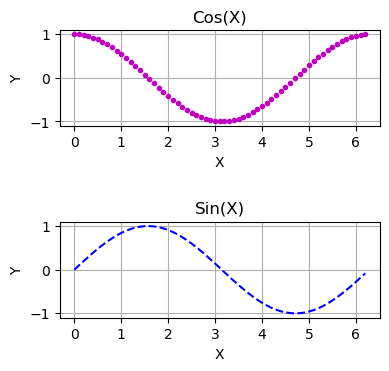

In [87]:
fig = plt.figure()

ax1 = fig.add_axes([0.1, 0.1, 0.5, 0.2]) # left, bottom, width, height (range 0 to 1)
ax2 = fig.add_axes([0.1, 0.5, 0.5, 0.2]) # left, bottom, width, height (range 0 to 1)

ax1.plot(x, y1, '--b')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('Sin(X)')
ax1.grid()

ax2.plot(x, y2, '.m')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Cos(X)')
ax2.grid()

## Задачи для совместного разбора

___1. При помощи библиотеки yfinance загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряды цен открытия и закрытия акций.___

In [88]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [89]:
import yfinance as yf

In [90]:
data = yf.download('AAPL', start='2017-01-01', end = '2018-12-31')
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,26.989269,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,26.959059,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.096157,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.398232,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.649185,134247600
...,...,...,...,...,...,...
2018-12-21,39.215000,39.540001,37.407501,37.682499,36.121975,382978400
2018-12-24,37.037498,37.887501,36.647499,36.707500,35.187355,148676800
2018-12-26,37.075001,39.307499,36.680000,39.292500,37.665302,234330000


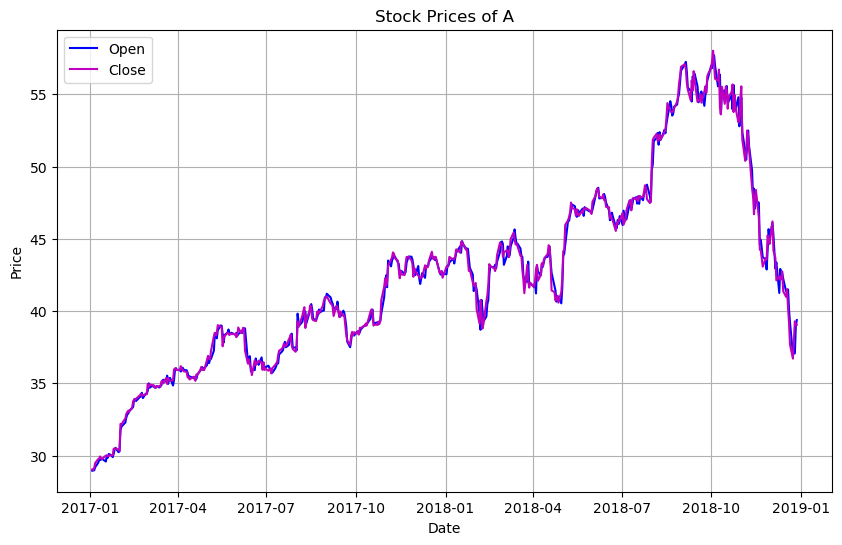

In [91]:
plt.figure(figsize=(10,6))
plt.plot(data['Open'],label='Open',color='b')
plt.plot(data['Close'],label='Close',color='m')
plt.title('Stock Prices of A')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.legend(loc = 'upper left')
plt.show()

<Axes: >

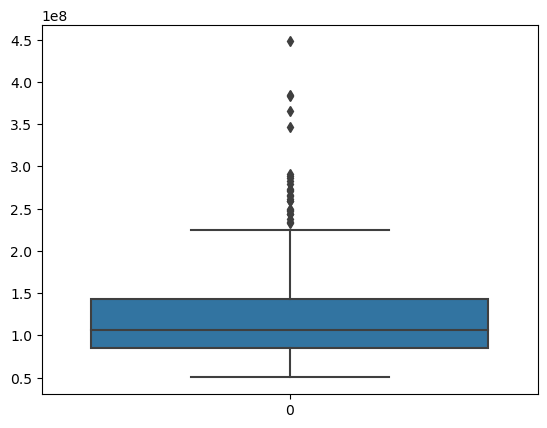

In [92]:
sns.boxplot(data=data['Volume'])

___2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.___

## Лабораторная работа 4.1

### Визуализация данных при помощи пакета `matplotlib`

В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.

___1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов.___

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

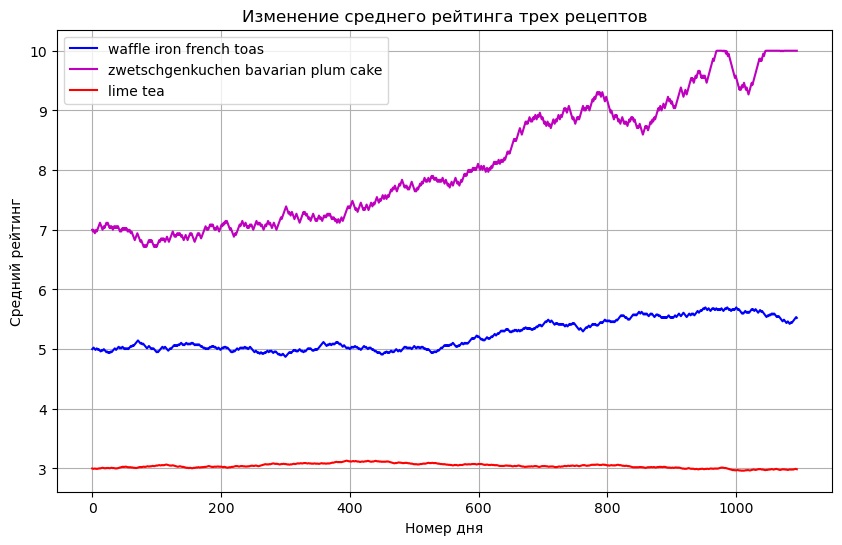

In [93]:
data = np.load('average_ratings.npy')
    
data = pd.DataFrame(data).T

plt.figure(figsize=(10,6))
plt.plot(data[[0]],label='waffle iron french toas',color='b')
plt.plot(data[[1]],label='zwetschgenkuchen bavarian plum cake',color='m')
plt.plot(data[[2]],label='lime tea',color='r')
plt.title('Изменение среднего рейтинга трех рецептов')
plt.xlabel('Номер дня')
plt.ylabel('Средний рейтинг')
plt.grid()
plt.legend(loc = 'upper left')
plt.show()

___2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))___

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


C:\Users\ivant\AppData\Local\Temp\ipykernel_24516\2198767343.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  plt.plot(pd.date_range(start = '01.01.2019',end = '30.12.2021'),data[0],label='waffle iron french toas',color='b')
C:\Users\ivant\AppData\Local\Temp\ipykernel_24516\2198767343.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  plt.plot(pd.date_range(start = '01.01.2019',end = '30.12.2021'),data[2],label='lime tea',color='r')
C:\Users\ivant\AppData\Local\Temp\ipykernel_24516\2198767343.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  plt.plot

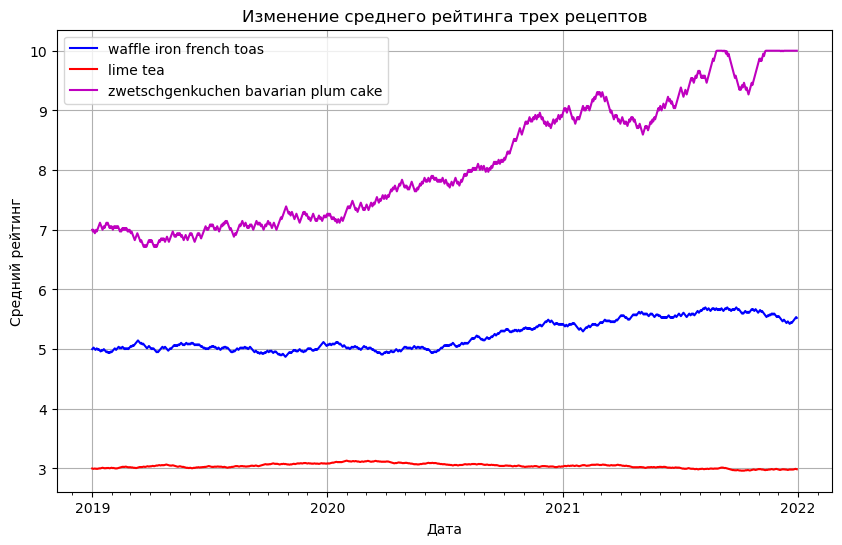

In [94]:
fig,ax = plt.subplots(figsize=(10,6))

plt.plot(pd.date_range(start = '01.01.2019',end = '30.12.2021'),data[0],label='waffle iron french toas',color='b')
plt.plot(pd.date_range(start = '01.01.2019',end = '30.12.2021'),data[2],label='lime tea',color='r')
plt.plot(pd.date_range(start = '01.01.2019',end = '30.12.2021'),data[1],label='zwetschgenkuchen bavarian plum cake',color='m')

plt.title('Изменение среднего рейтинга трех рецептов')
plt.xlabel('Дата')
plt.ylabel('Средний рейтинг')

ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 13)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

plt.grid()
plt.legend(loc = 'upper left')
plt.show()

___3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2.___

C:\Users\ivant\AppData\Local\Temp\ipykernel_24516\583042369.py:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  ax1.plot(pd.date_range(start = '01.01.2019',end = '30.12.2021'),data[1],label='zwetschgenkuchen bavarian plum cake',color='m')
C:\Users\ivant\AppData\Local\Temp\ipykernel_24516\583042369.py:15: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  ax2.plot(pd.date_range(start = '01.01.2019',end = '30.12.2021'),data[0],label='waffle iron french toas',color='b')
C:\Users\ivant\AppData\Local\Temp\ipykernel_24516\583042369.py:23: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure cons

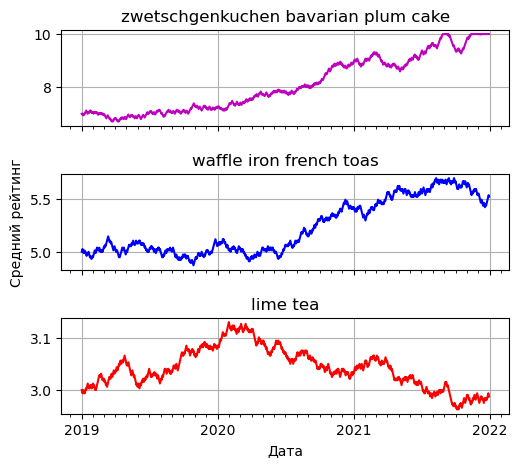

In [95]:
fig = plt.figure()

ax1 = fig.add_axes([0.1, 1, 0.7, 0.2]) # left, bottom, width, height (range 0 to 1)
ax2 = fig.add_axes([0.1, 0.7, 0.7, 0.2])
ax3 = fig.add_axes([0.1, 0.4, 0.7, 0.2])

ax1.plot(pd.date_range(start = '01.01.2019',end = '30.12.2021'),data[1],label='zwetschgenkuchen bavarian plum cake',color='m')
ax1.set_title('zwetschgenkuchen bavarian plum cake')
ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 13)))
ax1.xaxis.set_minor_locator(mdates.MonthLocator())
ax1.xaxis.set_tick_params(labelbottom=False)
ax1.grid()


ax2.plot(pd.date_range(start = '01.01.2019',end = '30.12.2021'),data[0],label='waffle iron french toas',color='b')
ax2.set_ylabel('Средний рейтинг')
ax2.set_title('waffle iron french toas')
ax2.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 13)))
ax2.xaxis.set_minor_locator(mdates.MonthLocator())
ax2.xaxis.set_tick_params(labelbottom=False)
ax2.grid()

ax3.plot(pd.date_range(start = '01.01.2019',end = '30.12.2021'),data[2],label='lime tea',color='r')
ax3.set_title('lime tea')
ax3.set_xlabel('Дата')
ax3.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 13)))
ax3.xaxis.set_minor_locator(mdates.MonthLocator())
ax3.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
ax3.grid()
plt.show()

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


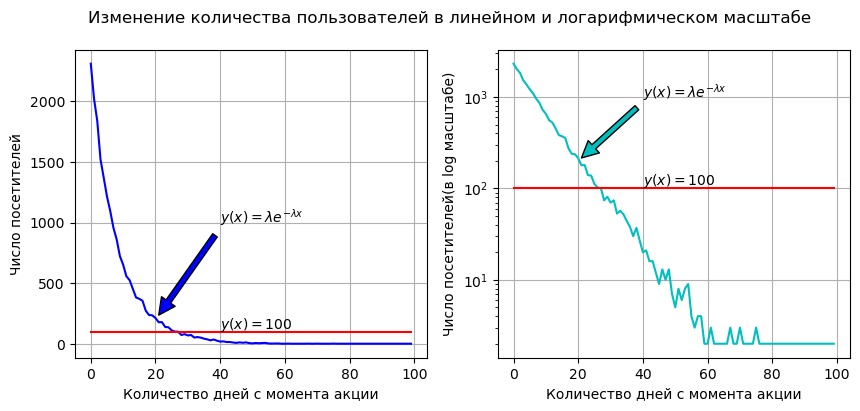

In [96]:
data = np.load('visitors.npy')

fig,ax = plt.subplots(1,2,figsize=(10,4))

ax[0].plot(data,label='visitors',color='b')
ax[0].plot(len(data)*[100],label='$y(x)=100$',color='r')
ax[0].annotate("$y(x)=\lambda e^{-\lambda x}$", xy=(20, 200), xytext=(40,1000),arrowprops=dict(facecolor='b', shrink=0.05))
ax[0].text(40, 125, "$y(x)=100$")
ax[0].set_xlabel('Количество дней с момента акции')
ax[0].set_ylabel('Число посетителей')
ax[0].grid()


ax[1].plot(data,label='visitors',color='c')
ax[1].plot(len(data)*[100],label='$y(x)=100$',color='r')
ax[1].annotate("$y(x)=\lambda e^{-\lambda x}$", xy=(20, 200), xytext=(40,1000),arrowprops=dict(facecolor='c', shrink=0.05))
ax[1].text(40, 110, "$y(x)=100$")
ax[1].set_yscale("log")
ax[1].set_xlabel('Количество дней с момента акции')
ax[1].set_ylabel('Число посетителей(в log масштабе)')
ax[1].grid()

plt.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе')
plt.show()

## Лабораторная работа 4.2

#### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [97]:
reviews = pd.read_csv('reviews_sample.csv', index_col=0, parse_dates=['date'])
recipes = pd.read_csv('recipes_sample.csv')

___5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.___

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

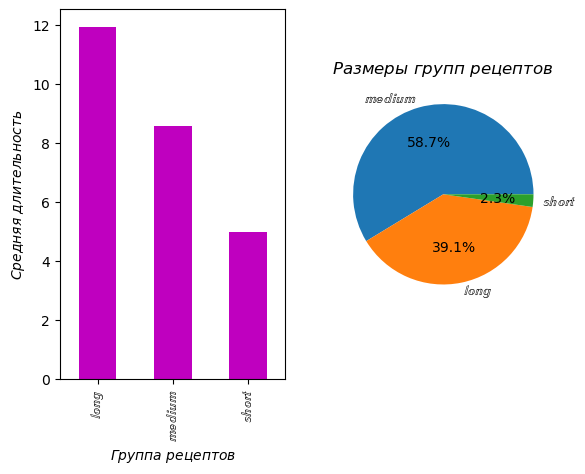

In [98]:
def duration(minutes):
    if minutes < 5:
        return '$\mathbb{short}$'
    
    elif minutes < 50:
        return '$\mathbb{medium}$'
    
    else:
        return '$\mathbb{long}$'
    
recipes['duration'] = recipes['minutes'].apply(duration)

m_steps = recipes.groupby('duration')['n_steps'].mean()

g_sizes = recipes['duration'].value_counts()

ax1 = plt.subplot(1, 2, 1)
m_steps.plot(kind='bar', color='m')
ax1.set_xlabel('$Группа~рецептов$')
ax1.set_ylabel("$Средняя~длительность$")

ax2 = plt.subplot(1, 2, 2)
g_sizes.plot(kind='pie', autopct='%1.1f%%')
ax2.set_ylabel("")
plt.title("$Размеры~групп~рецептов$")
plt.show()

___6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.___

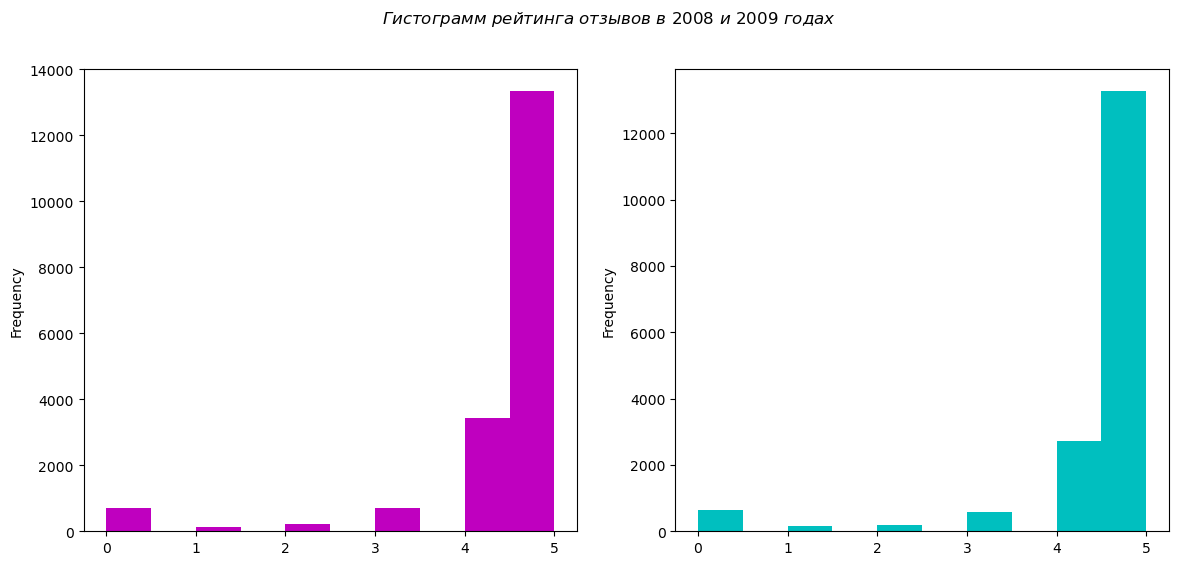

In [99]:

rev8 = reviews[(reviews['date'] > '2008-01-01') & (reviews['date'] < '2009-01-01')]
rev9 = reviews[(reviews['date'] > '2009-01-01') & (reviews['date'] < '2010-01-01')]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

rev8['rating'].plot.hist(ax=ax1,color='m')
rev9['rating'].plot.hist(ax=ax2,color='c')

fig.suptitle('$Гистограмм~рейтинга~отзывов~в~2008~и~2009~годах$')
plt.show()

#### Визуализация данных при помощи пакета `seaborn`

___7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5).___

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

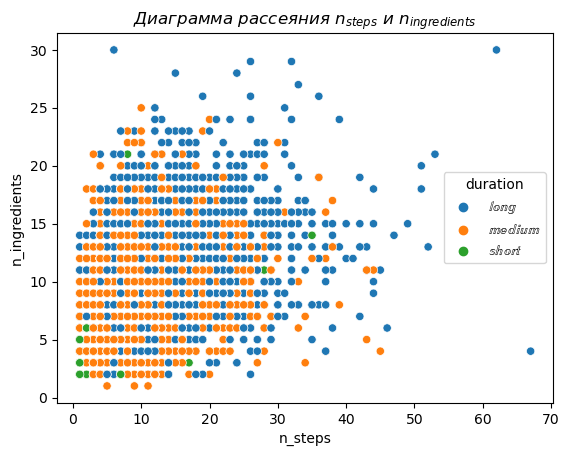

In [100]:
sns.scatterplot(x='n_steps', y='n_ingredients', hue='duration', data=recipes)
plt.title('$Диаграмма~рассеяния~n_{steps}~и~n_{ingredients}$')
plt.show()

#### Корреляция либо отсутствует, либо наблюдается слабая возрастающая

___8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap).___ 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

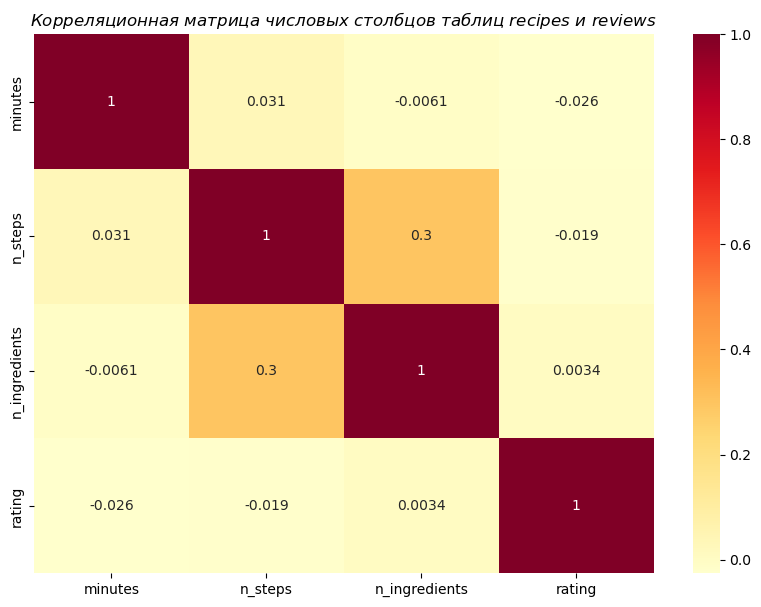

In [110]:
rr = recipes[["id", "minutes", "n_steps", "n_ingredients"]].merge(reviews[['recipe_id', 'rating']], left_on='id', right_on='recipe_id',how='outer')
rr= rr.drop(["id", 'recipe_id'], axis=1)

cormatrix = rr[['minutes', 'n_steps', 'n_ingredients', 'rating']].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(cormatrix, annot=True, cmap='YlOrRd')
plt.title('$Корреляционная~матрица~числовых~столбцов~таблиц~recipes~и~reviews$')
plt.show()